In [18]:
import pandas as pd
from sklearn.ensemble import IsolationForest
df = pd.read_csv("states.csv")
import matplotlib.pyplot as plt

In [19]:
!python -V

Python 3.9.6


In [20]:
iforest = IsolationForest(n_estimators=1000).fit(df.iloc[:,1:])

In [21]:
iforestScores = iforest.score_samples(df.iloc[:,1:])

In [22]:
from treeCode import treecode

In [23]:
a = df.columns


In [24]:
import statsmodels.api as sm


In [25]:
df2 = pd.concat([pd.DataFrame(iforestScores),df],axis=1)

df2.columns = a.insert(0,"Anomaly")

In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(df2[a[1:]], df2['States'])



In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import numpy as np

regr = DecisionTreeRegressor(max_depth=50, random_state=1234)
X = df2[a[1:]]
model = regr.fit(df2[a[1:]], abs(df2['Anomaly']))

# Print rules
rules = treecode.get_rules(regr, a[1:], None)

In [86]:
rules

['if (White > 65.1) and (Income > 59549.5) and (Infant Mort > 5.25) and (Infant Mort > 7.0) then response: 0.456 | based on 1 samples',
 'if (White > 65.1) and (Income <= 59549.5) and (Traf Deaths <= 1.885) and (Doctors <= 339.5) and (White <= 84.15) and (University > 25.95) and (Doctors <= 252.55) and (Doctors <= 234.15) then response: 0.444 | based on 1 samples',
 'if (White > 65.1) and (Income <= 59549.5) and (Traf Deaths <= 1.885) and (Doctors <= 339.5) and (White > 84.15) and (Crime > 263.5) and (University <= 21.3) then response: 0.455 | based on 1 samples',
 'if (White > 65.1) and (Income <= 59549.5) and (Traf Deaths <= 1.885) and (Doctors <= 339.5) and (White > 84.15) and (Crime <= 263.5) and (Infant Mort > 6.95) then response: 0.461 | based on 1 samples',
 'if (White > 65.1) and (Income <= 59549.5) and (Traf Deaths <= 1.885) and (Doctors <= 339.5) and (White > 84.15) and (Crime <= 263.5) and (Infant Mort <= 6.95) and (Crime > 237.0) then response: 0.429 | based on 1 samples',


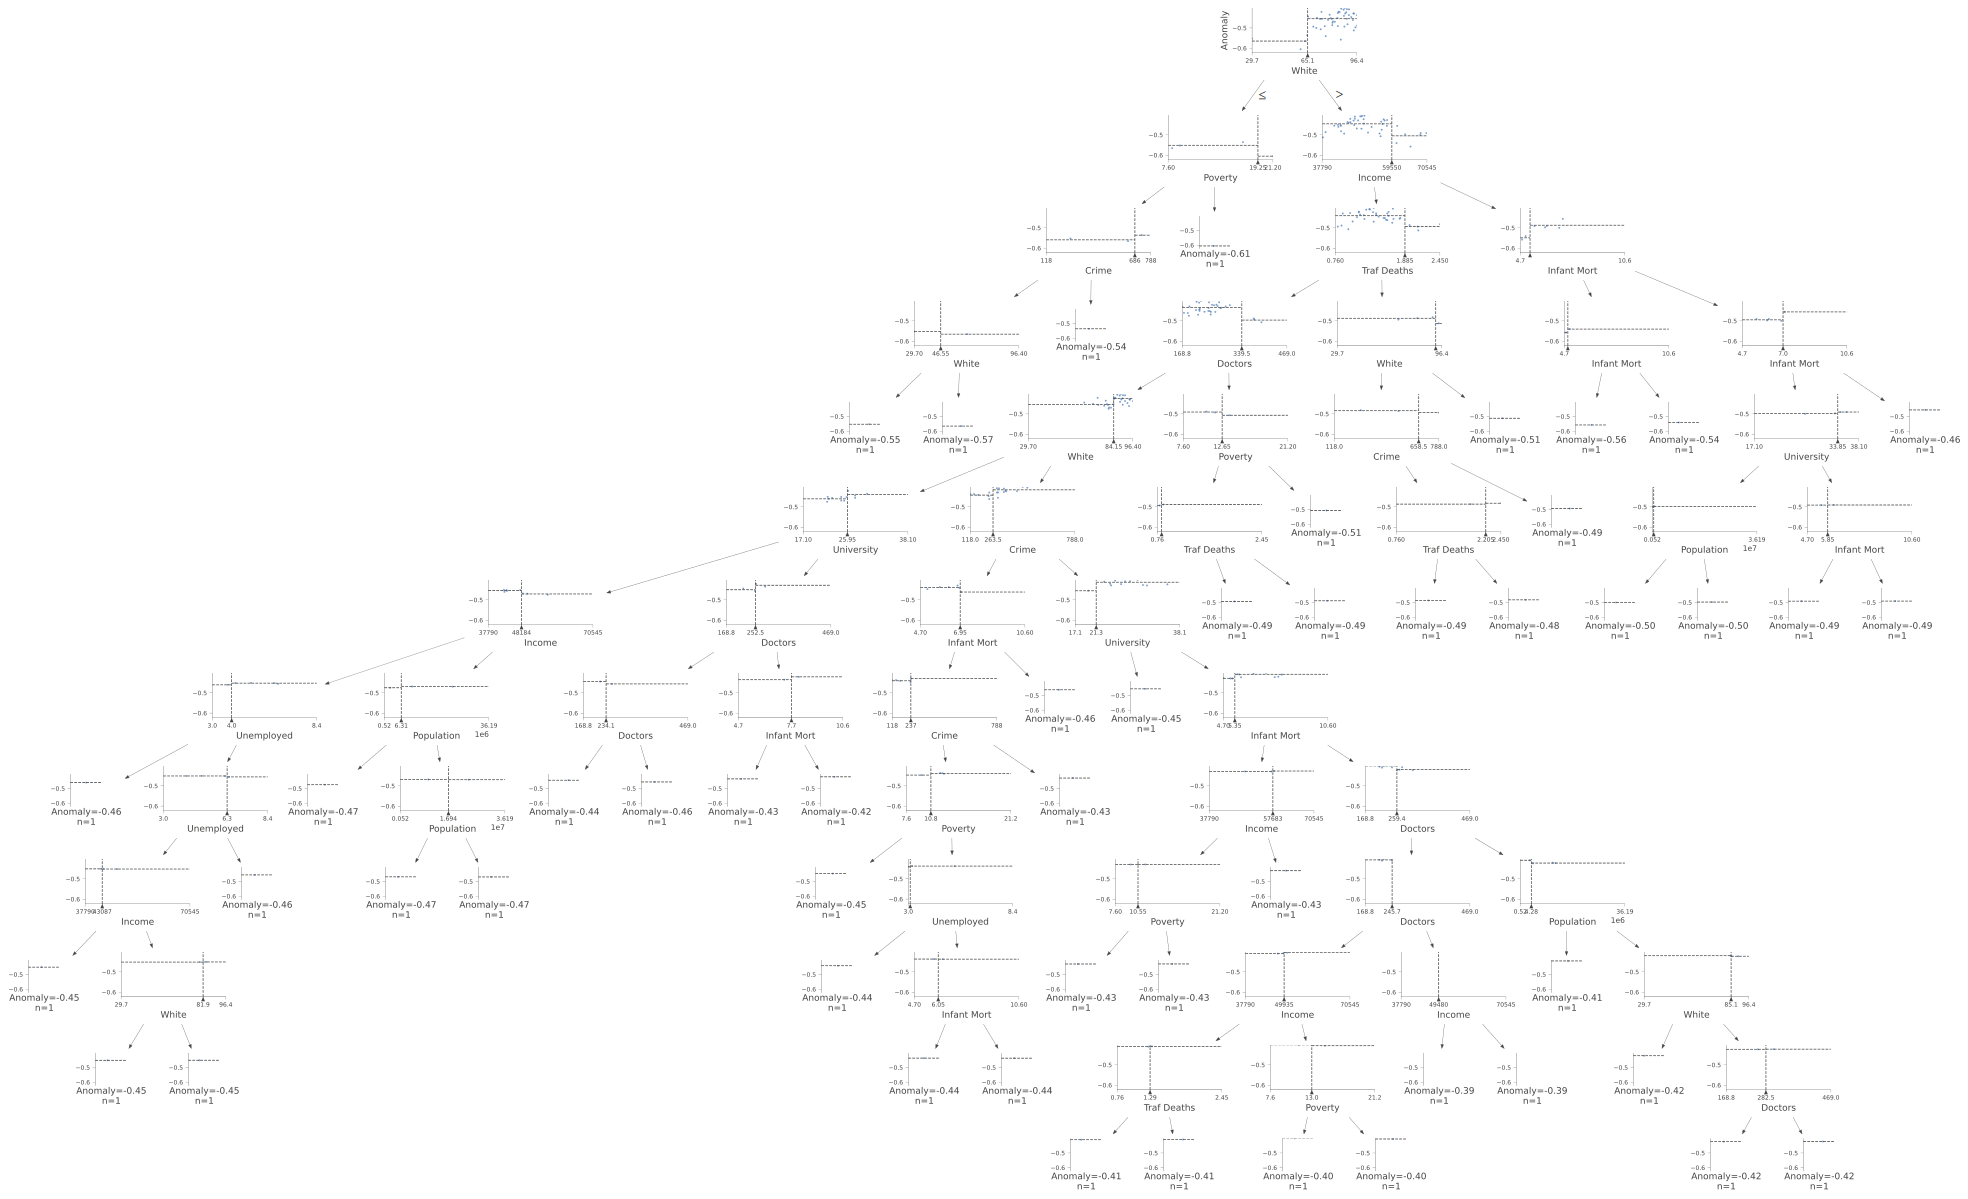

In [28]:
from dtreeviz.trees import dtreeviz # remember to load the package
#https://github.com/matplotlib/matplotlib/issues/13139/
import matplotlib.font_manager

viz = dtreeviz(model, X, df2['Anomaly'],
                target_name="Anomaly",
                feature_names=X.columns
              )

viz

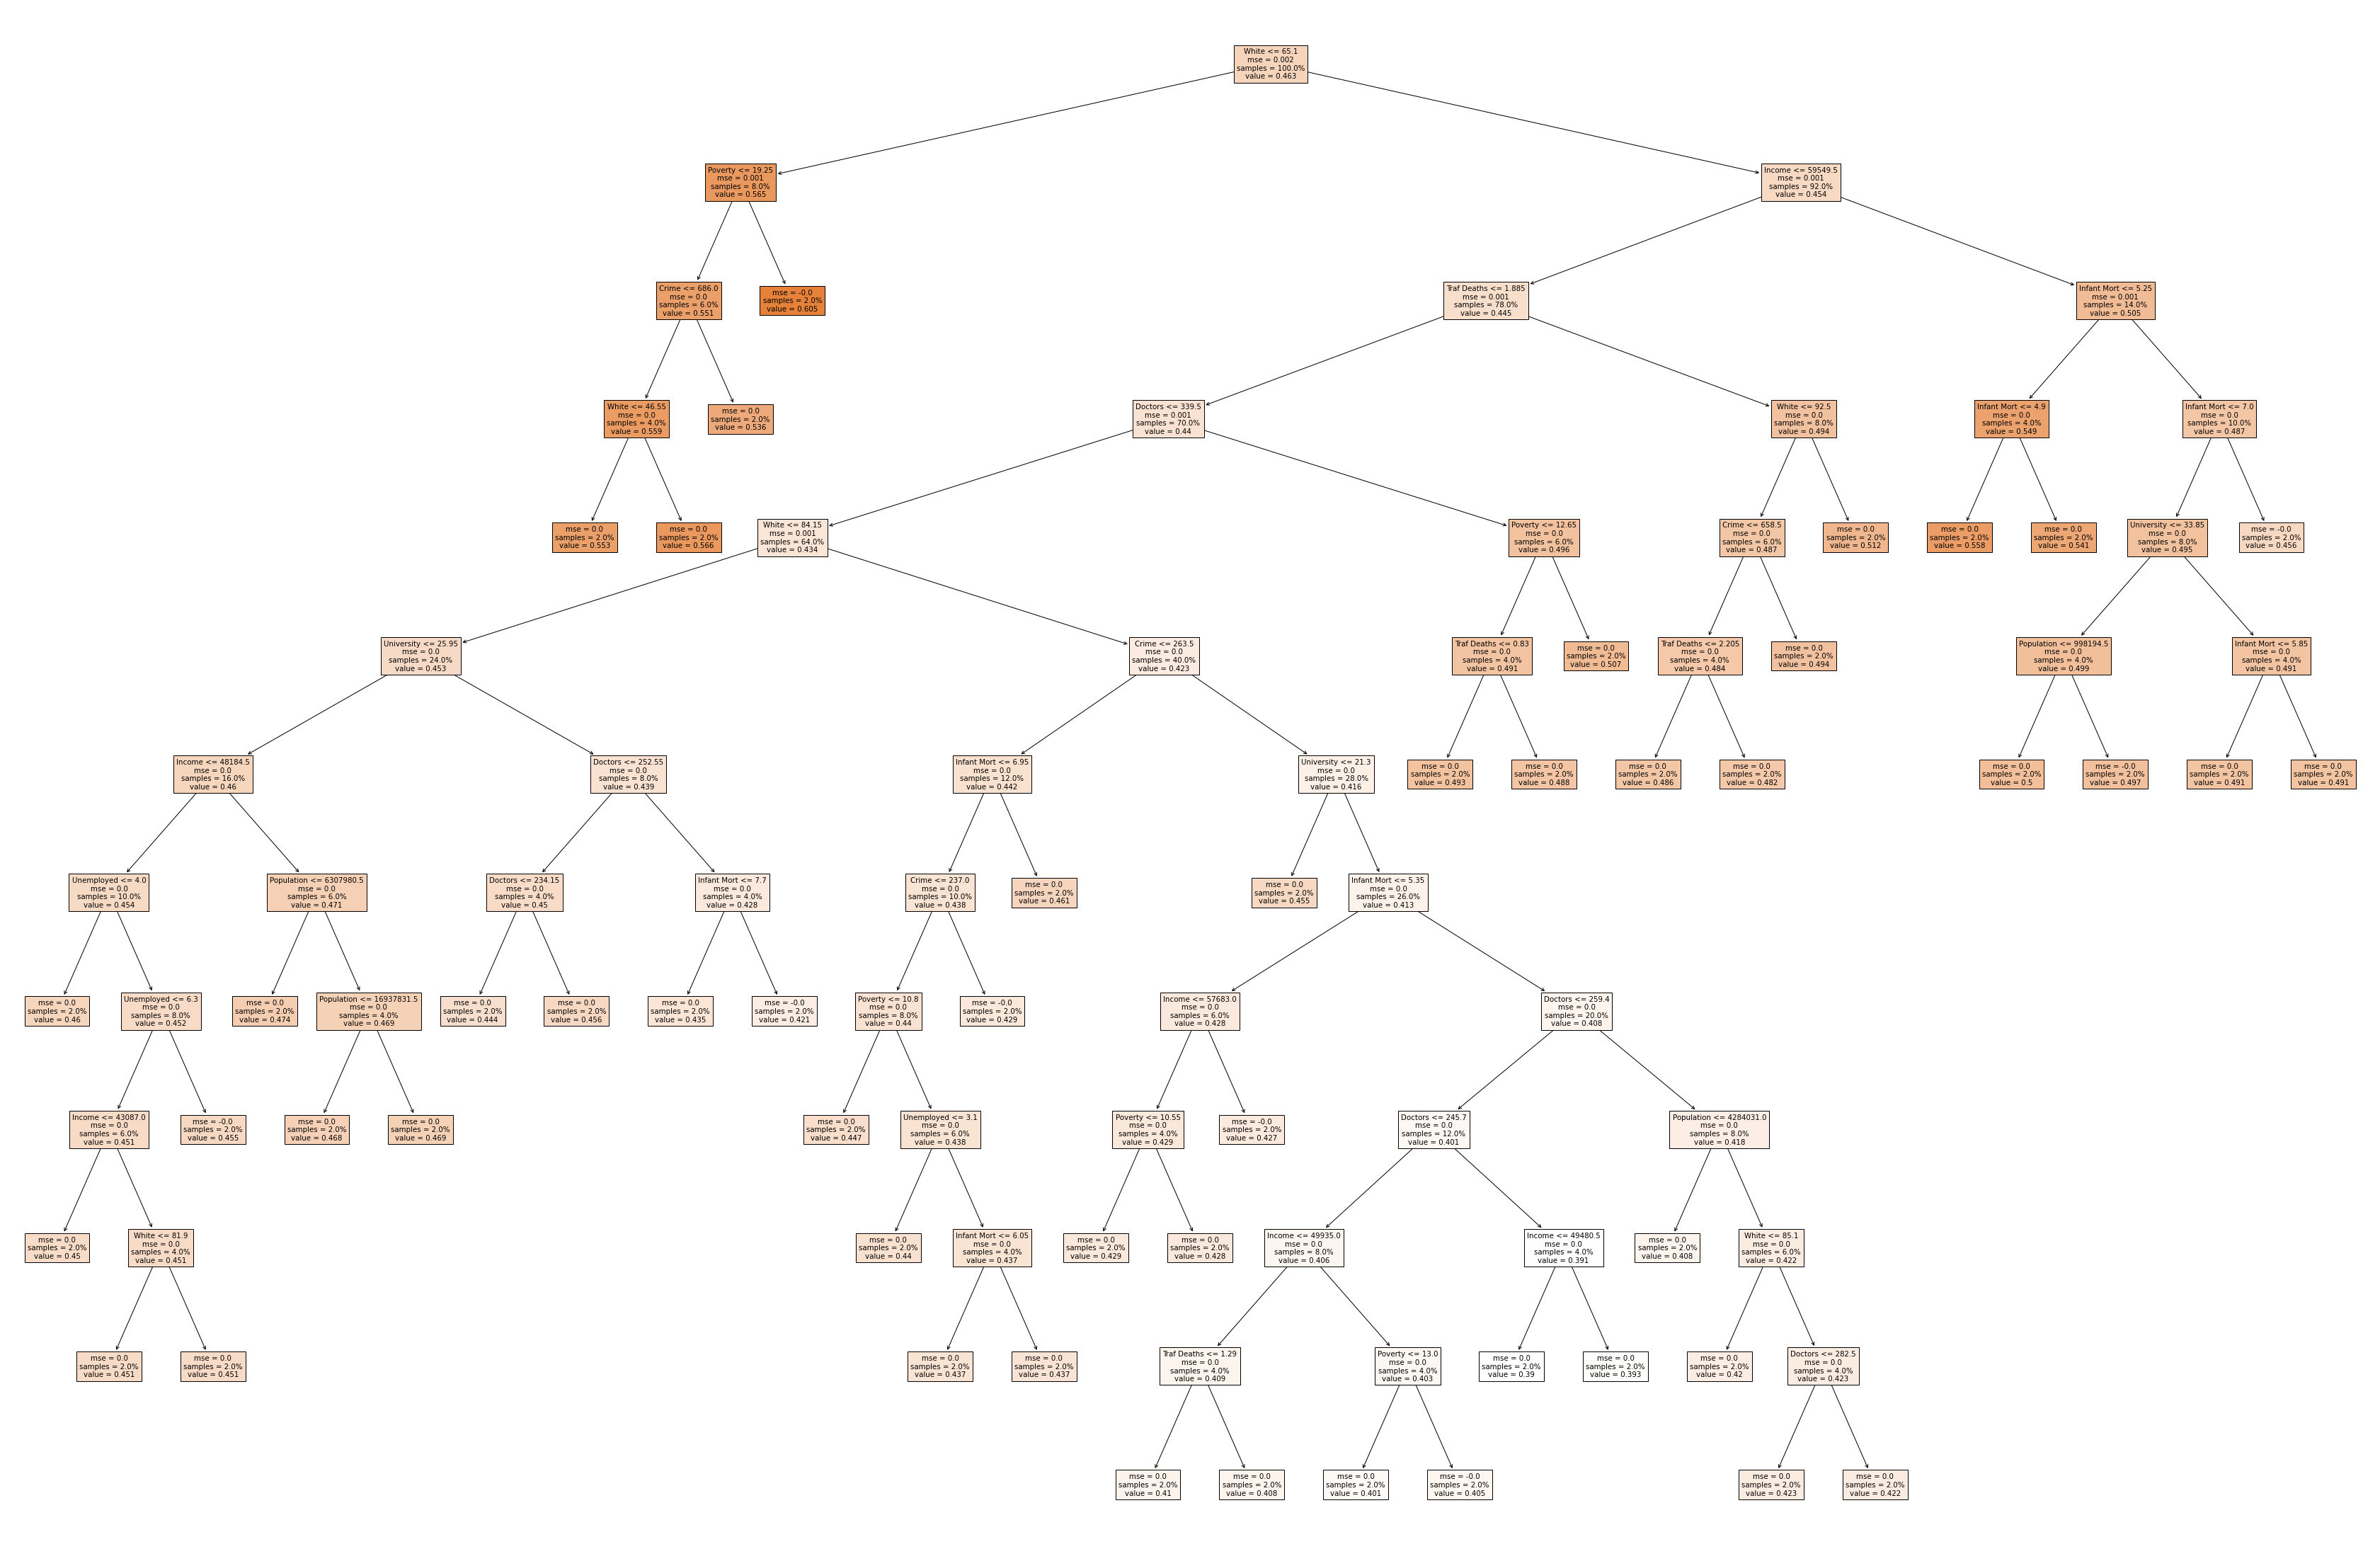

In [29]:
fig = plt.figure(figsize=(60,40))
_ = tree.plot_tree(regr, 
                   feature_names=a[1:],  
                   proportion = True,
                   #class_names=combined['States'],
                   #label=all,
                   filled=True)

In [56]:
df2.describe()

,Anomaly,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,5.000000e+01
mean,-0.463162,12.732000,6.830000,81.96200,407.480000,260.276000,1.40440,26.940000,5.270000,51985.100000,6.016154e+06
std,0.048081,2.939002,1.338786,11.97458,183.633868,64.363415,0.38654,4.761152,1.253933,8592.657934,6.663772e+06
min,-0.605127,7.600000,4.700000,29.70000,118.000000,168.800000,0.76000,17.100000,3.000000,37790.000000,5.232260e+05
25%,-0.490973,10.450000,5.725000,76.15000,278.250000,218.425000,1.14000,24.025000,4.400000,46161.250000,1.779632e+06
50%,-0.455113,12.400000,6.850000,84.55000,345.500000,249.050000,1.37500,26.200000,5.300000,50173.000000,4.313980e+06
75%,-0.428478,14.700000,7.750000,89.85000,520.000000,274.800000,1.62000,29.825000,6.275000,56903.000000,6.490796e+06
max,-0.389894,21.200000,10.600000,96.40000,788.000000,469.000000,2.45000,38.100000,8.400000,70545.000000,3.618591e+07


In [64]:
df2

,Anomaly,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
0,-0.450359,Alabama,15.7,9.0,71.0,448,218.2,1.81,22.0,5.0,42666,4634063
1,-0.499858,Alaska,8.4,6.9,70.6,661,228.5,1.63,27.3,6.7,68460,679893
2,-0.404972,Arizona,14.7,6.4,86.5,483,209.7,1.69,25.1,5.5,50958,6360238
3,-0.486310,Arkansas,17.3,8.5,80.8,529,203.4,1.96,18.8,5.1,38815,2841595
4,-0.540533,California,13.3,5.0,76.6,523,268.7,1.21,29.6,7.2,61021,36185908
5,-0.422964,Colorado,11.4,5.7,89.7,348,259.7,1.14,35.6,4.9,56993,4837229
6,-0.490600,Connecticut,9.3,6.2,84.3,256,376.4,0.86,35.6,5.7,68595,3488084
7,-0.455517,Delaware,10.0,8.3,74.3,689,250.9,1.23,27.5,4.8,57989,865314
8,-0.451457,Florida,13.2,7.3,79.8,723,247.9,1.56,25.8,6.2,47778,18262096
9,-0.443886,Georgia,14.7,8.1,65.4,493,217.4,1.46,27.5,6.2,50861,9526642


In [31]:
import scipy.stats as st


In [32]:
#df2[a[1:]]
standardDevs = ((df2[a[1:]]-df2[a[1:]].describe().loc['mean'])/df2[a[1:]].describe().loc['std'])

mdist = pd.DataFrame((pd.DataFrame(st.norm.cdf(abs(standardDevs)),columns=standardDevs.columns).sum(axis=1)/len(standardDevs.columns)-.5)*2,columns=['mdist'])

#mdist = pd.DataFrame((st.norm.cdf(abs(((df2[a[1:]]-df2[a[1:]].describe().loc['mean'])/df2[a[1:]].describe().loc['std'])).sum(axis=1)/len(df2[a[1:]].columns)/2)-.5)*2,columns=['mdist'])
#mdist = pd.DataFrame(abs(((df2[a[1:]]-df2[a[1:]].describe().loc['mean'])/df2[a[1:]].describe().loc['std'])).sum(axis=1),columns=['mdist'])

In [63]:
mdist.set_index(df2['States']).sort_values(by='mdist')

,mdist
States,
Pennsylvania,0.243704
Missouri,0.261286
Wisconsin,0.268269
Arizona,0.305395
Kansas,0.312488
Oregon,0.352832
Indiana,0.359310
Washington,0.372141
Texas,0.377086


In [58]:
#pd.DataFrame(st.norm.cdf(abs((df2[a[1:]]-df2[a[1:]].describe().loc['mean']))),columns=standardDevs.columns).set_index(df2['States'])
abs(standardDevs.set_index(df2['States']))

,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
States,,,,,,,,,,
Alabama,1.009867,1.620872,0.915439,0.220656,0.653725,1.049310,1.037564,0.215323,1.084542,0.207404
Alaska,1.473970,0.052286,0.948843,1.380573,0.493697,0.583640,0.075612,1.140412,1.917323,0.800787
Arizona,0.669615,0.321187,0.378969,0.411253,0.785788,0.738863,0.386461,0.183423,0.119532,0.051635
Arkansas,1.554269,1.247399,0.097039,0.661752,0.883670,1.437369,1.709670,0.135573,1.532715,0.476391
California,0.193263,1.366910,0.447782,0.629078,0.130882,0.502924,0.558688,1.539158,1.051584,4.527429
Colorado,0.453215,0.844049,0.646202,0.323905,0.008949,0.684018,1.818887,0.295072,0.582812,0.176916
Connecticut,1.167743,0.470576,0.195247,0.824902,1.804193,1.408394,1.818887,0.342921,1.933034,0.379375
Delaware,0.929567,1.098010,0.639855,1.533051,0.145673,0.451183,0.117619,0.374821,0.698724,0.772962
Florida,0.159238,0.351064,0.180549,1.718202,0.192283,0.402546,0.239438,0.741667,0.489616,1.837689


In [20]:
from zca import zca
import numpy as np

N = 100
K= 4

data = np.random.rand(N, K)

zca = zca.ZCA()

# Separate fit and transform
zca.fit(standardDevs)

data_zca = zca.transform(standardDevs)

data_zca = zca.fit_transform(standardDevs)

In [23]:

#zcaS = pd.DataFrame(abs(data_zca),columns=standardDevs.columns)
zcaS = pd.DataFrame((pd.DataFrame(st.norm.cdf(abs(data_zca)),columns=standardDevs.columns).sum(axis=1)/len(df2[a[1:]].columns)-.5)*2,columns=['ZCAs'])
#zcaS = pd.DataFrame(zcaS.sum(axis=1),columns=['ZCAs'])

#zcaS = zcaS/len(df2[a[1:]].columns)/2
#zcaS = pd.DataFrame((st.norm.cdf(zcaS)-.5)*2,columns=['ZCAs'])
#zcaS =  pd.DataFrame((st.norm.cdf(pd.DataFrame(abs(data_zca),columns=standardDevs.columns).sum(axis=1)/len(df2[a[1:]].columns)/2)-.5)*2,columns=['ZCAs'])
#zcaS


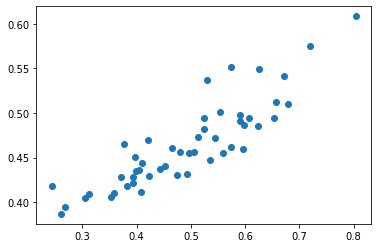

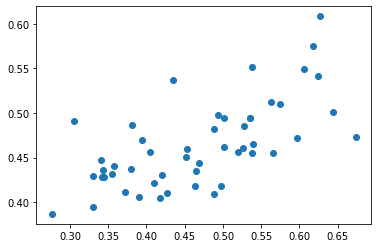

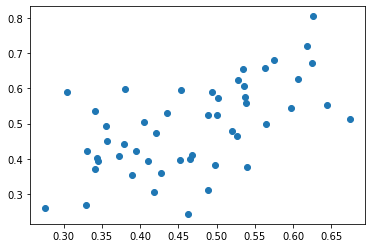

In [28]:
combined = pd.concat([mdist,zcaS,df2],axis=1)

plt.scatter(abs(combined['mdist']),abs(combined['Anomaly']))

plt.show()

plt.scatter(abs(combined['ZCAs']),abs(combined['Anomaly']))

plt.show()

plt.scatter(abs(combined['ZCAs']),abs(combined['mdist']))

plt.show()

/tmp/ipykernel_986666/461913069.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha, rotation = 45)
/tmp/ipykernel_986666/461913069.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


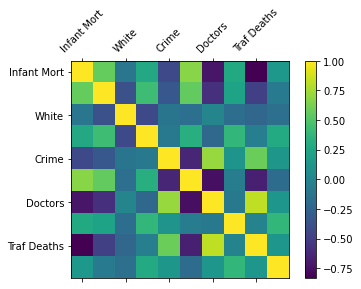

/tmp/ipykernel_986666/461913069.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha, rotation = 45)
/tmp/ipykernel_986666/461913069.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


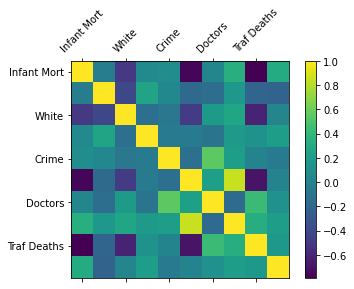

In [98]:
alpha = df2.iloc[:,2:].columns

#data = np.random.random((4,4))
import pingouin as pg

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df2.iloc[:,2:].corr(), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha, rotation = 45)
ax.set_yticklabels(['']+alpha)

#plt.matshow(df2.iloc[:,2:].corr())
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df2.iloc[:,2:].pcorr().round(3), interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha, rotation = 45)
ax.set_yticklabels(['']+alpha)

plt.show()

In [29]:
display(combined.sort_values(kind="quicksort", ascending=True, by='mdist',key=abs))
display(combined.sort_values(kind="quicksort", ascending=True, by='ZCAs',key=abs))
display(combined.sort_values(kind="quicksort", ascending=True, by='Anomaly',key=abs))

,mdist,ZCAs,Anomaly,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
37,0.243704,0.463287,-0.417914,Pennsylvania,12.1,7.6,85.4,417,305.3,1.37,26.3,5.4,50713,12517701
24,0.261286,0.276045,-0.386799,Missouri,13.4,7.4,85.0,505,246.0,1.43,25.0,6.1,46867,5905750
48,0.268269,0.329817,-0.394472,Wisconsin,10.4,6.4,89.7,291,259.1,1.27,25.7,4.7,52094,5601508
2,0.305395,0.417609,-0.405072,Arizona,14.7,6.4,86.5,483,209.7,1.69,25.1,5.5,50958,6360238
15,0.312488,0.488428,-0.408998,Kansas,11.3,7.1,88.7,453,222.5,1.38,29.6,4.4,50177,2773740
36,0.352832,0.389590,-0.405230,Oregon,13.6,5.5,90.1,288,274.5,1.31,28.1,6.4,50169,3730833
13,0.359310,0.426809,-0.409741,Indiana,13.1,8.0,88.0,334,216.9,1.26,22.9,5.9,47966,6344771
46,0.372141,0.341399,-0.427875,Washington,11.3,4.7,84.3,333,270.0,1.00,30.7,5.3,58078,6464167
42,0.377086,0.539275,-0.465710,Texas,15.8,6.2,82.4,511,214.2,1.38,25.3,4.9,50043,23824518
34,0.383025,0.497870,-0.418113,Ohio,13.4,7.8,84.8,343,266.7,1.14,24.1,6.5,47988,11518989


,mdist,ZCAs,Anomaly,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
24,0.261286,0.276045,-0.386799,Missouri,13.4,7.4,85.0,505,246.0,1.43,25.0,6.1,46867,5905750
29,0.589919,0.304596,-0.491133,New Jersey,8.7,5.5,76.0,329,316.3,0.95,34.4,5.5,70378,8630810
48,0.268269,0.329817,-0.394472,Wisconsin,10.4,6.4,89.7,291,259.1,1.27,25.7,4.7,52094,5601508
11,0.422498,0.330006,-0.429050,Idaho,12.6,6.8,94.6,239,168.8,1.60,24.0,4.9,47576,1498390
0,0.534694,0.340413,-0.447529,Alabama,15.7,9.0,71.0,448,218.2,1.81,22.0,5.0,42666,4634063
46,0.372141,0.341399,-0.427875,Washington,11.3,4.7,84.3,333,270.0,1.00,30.7,5.3,58078,6464167
12,0.403657,0.343561,-0.435746,Illinois,12.2,7.3,79.1,533,280.2,1.16,29.9,6.5,56235,12775864
5,0.394352,0.345114,-0.428039,Colorado,11.4,5.7,89.7,348,259.7,1.14,35.6,4.9,56993,4837229
22,0.493641,0.355209,-0.432065,Minnesota,9.6,5.2,89.0,289,293.2,0.88,31.5,5.4,57288,5191267
40,0.451761,0.357382,-0.440174,South Dakota,12.5,6.9,88.2,169,219.1,1.62,25.1,3.0,46032,795521


,mdist,ZCAs,Anomaly,States,Poverty,Infant Mort,White,Crime,Doctors,Traf Deaths,University,Unemployed,Income,Population
24,0.261286,0.276045,-0.386799,Missouri,13.4,7.4,85.0,505,246.0,1.43,25.0,6.1,46867,5905750
48,0.268269,0.329817,-0.394472,Wisconsin,10.4,6.4,89.7,291,259.1,1.27,25.7,4.7,52094,5601508
2,0.305395,0.417609,-0.405072,Arizona,14.7,6.4,86.5,483,209.7,1.69,25.1,5.5,50958,6360238
36,0.352832,0.389590,-0.405230,Oregon,13.6,5.5,90.1,288,274.5,1.31,28.1,6.4,50169,3730833
15,0.312488,0.488428,-0.408998,Kansas,11.3,7.1,88.7,453,222.5,1.38,29.6,4.4,50177,2773740
13,0.359310,0.426809,-0.409741,Indiana,13.1,8.0,88.0,334,216.9,1.26,22.9,5.9,47966,6344771
26,0.408726,0.372005,-0.411797,Nebraska,10.8,5.6,91.4,302,245.4,1.32,27.1,3.3,49693,1768745
37,0.243704,0.463287,-0.417914,Pennsylvania,12.1,7.6,85.4,417,305.3,1.37,26.3,5.4,50713,12517701
34,0.383025,0.497870,-0.418113,Ohio,13.4,7.8,84.8,343,266.7,1.14,24.1,6.5,47988,11518989
32,0.393212,0.409962,-0.420987,North Carolina,14.6,8.1,73.9,466,254.2,1.62,26.1,6.3,46549,9047856


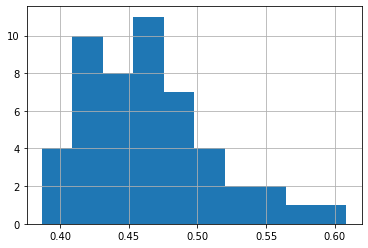

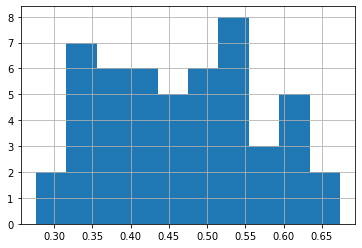

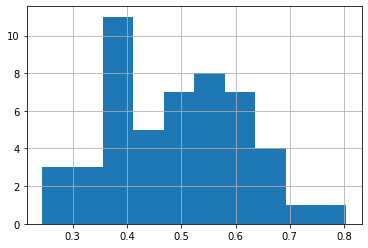

In [35]:
abs(combined.Anomaly).hist()
plt.show()
(combined.ZCAs).hist()
plt.show()
(combined.mdist).hist()
plt.show()

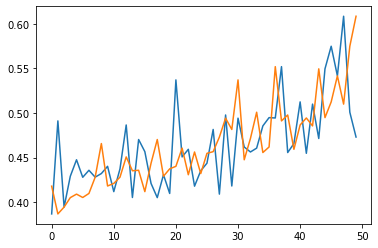

In [30]:
plt.plot(abs(pd.Series(combined.sort_values(kind="quicksort", ascending=True, by='ZCAs',key=abs)['Anomaly'])).reset_index(drop=True))
plt.plot(abs(pd.Series(combined.sort_values(kind="quicksort", ascending=True, by='mdist',key=abs)['Anomaly'])).reset_index(drop=True))
plt.show()

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

#fig, axes = plt.subplots(1, 2, )

ytdist = df2[a[1:]]
Z = hierarchy.linkage(ytdist, 'single')
plt.figure(figsize=(12, 10))
dn = hierarchy.dendrogram(Z)

<module 'posixpath' from '/mnt/distvol/Python3/lib/python3.9/posixpath.py'>

In [50]:
import imgkit

def highlight_greaterthan(x):
    if abs(x['Anomaly']) >= .6:
        return ['background-color: purple']*len(combined.columns)
    elif abs(x['Anomaly']) >= .55:
        return ['background-color: red']*len(combined.columns)
    elif abs(x['Anomaly']) >= .5:
        return ['background-color: yellow']*len(combined.columns)
    else:
        return ['background-color: white']*len(combined.columns)

html = combined.style.apply(highlight_greaterthan, axis=1).set_precision(4).render()

imgkit.from_string(html, 'state_anomalies.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

<AxesSubplot:>

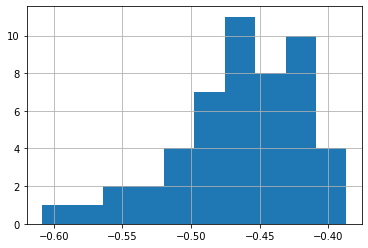